# 期末主題 2 - Ptt

專案⽬標： 根據版的熱⾨程度跟屬性，可選定以下任⼀種：
1.  八卦版：https://www.ptt.cc/bbs/Gossiping/index.html 
2.  政⿊板：https://www.ptt.cc/bbs/HatePolitics/index.html




## 期末專題實作提⽰ (基本⽬標)
<img src="期末專期(基本目標).png">



In [1]:
# -*- coding: utf-8 -*-
import requests
from bs4 import BeautifulSoup
import jieba

In [2]:
url = "https://www.ptt.cc/bbs/HatePolitics/index.html"  # 政⿊板

In [3]:
def checkformat(soup, class_tag, data, index, link):
    # 避免有些文章會被使用者自行刪除 標題列 時間  之類......
    try:
        content = soup.select(class_tag)[index].text
    except Exception as e:
        print('checkformat error URL', link)
        # print 'checkformat:',str(e)
        content = "no " + data
    return content

In [14]:
import re
# 設定cookie
cookies = {"over18" : "1"}
r = requests.get(url, cookies = cookies)
soup = BeautifulSoup(r.text, "html5lib")

arr = []
# 進入內頁抓
for d in soup.find_all(class_="title"):

    try:
                
        contentUrl = d.find('a')['href'] 
        link = 'https://www.ptt.cc'+contentUrl
        content = requests.get(link, cookies = cookies).text;
        r = BeautifulSoup(content, "html.parser")
#         title = d.text.replace('\t', '').replace('\n', '').replace('\u3000', '')
#         author = r.find(class_='article-meta-value').text
#         datetime = r.find_all(class_='article-meta-value')[-1].text
#         print('標題： ', title)
#         print('作者： ' + author)
#         print('時間： ' + datetime)

        # author 文章作者
        # author  = soup.select('.article-meta-value')[0].text
        author = checkformat(r, '.article-meta-value', 'author', 0, link)
        print('作者： ' + author)
        # title 文章標題  
        # title = soup.select('.article-meta-value')[2].text
        title = checkformat(r, '.article-meta-value', 'title', 2, link)
        print('標題： ', title)
        # date 文章日期
        # date = soup.select('.article-meta-value')[3].text
        date = checkformat(r, '.article-meta-value', 'date', 3, link)
        print('時間： ' + date)

        # ip       
        try:
                targetIP=u'※ 發信站: 批踢踢實業坊'
                ip =  r.find(string = re.compile(targetIP))
                ip = re.search(r"[0-9]*\.[0-9]*\.[0-9]*\.[0-9]*",ip).group()
        except:
                ip = "ip is not find"
        print(ip)
        
        sent_words = [list(jieba.lcut(title))]
        document = [" ".join(sent0) for sent0 in sent_words]
        
        
        #print(document)
        arr.append(document[0])
        #print(jieba.lcut(title))
           
    except:
        continue

print(arr)

作者： dakkk (我是牛我反芻)
標題：  Re: [新聞] 韓國瑜重啟春安 基層警：可能是治安敗壞
時間： Sat Apr 25 19:47:10 2020
223.137.82.15
作者： jasonn98 ()
標題：  [創作] 我夢到韓總統國瑜宣佈高雄獨立
時間： Sat Apr 25 19:52:14 2020
210.183.111.187
作者： abduraff (aa)
標題：  Re: [討論] 朱立倫當年到底怎麼輸給無業遊民蔡英文？
時間： Sat Apr 25 19:57:25 2020
150.116.31.50
作者： zoeforce (呼呼呼嘩哈哈哈)
標題：  Re: [新聞] 柯P自信口罩機不會敗 黃珊珊:市府吸收7元
時間： Sat Apr 25 20:00:46 2020
36.231.23.74
作者： yataiml001 (隨心)
標題：  [新聞] 沒去北市防疫旅館行程 柯文哲低調南下高
時間： Sat Apr 25 20:03:09 2020
110.28.137.149
作者： l881125566 (微風)
標題：  [討論] 大數據專家高虹安：韓粉約150-200萬人
時間： Sat Apr 25 20:05:21 2020
110.28.40.92
作者： fordmvp (無名氏)
標題：  Re: [討論] 實在不覺得中國未來發展會好
時間： Sat Apr 25 20:06:18 2020
59.126.170.22
作者： jasonn98 ()
標題：  [新聞] 韓國瑜不認「封城秀急」 名嘴揭： 「這
時間： Sat Apr 25 20:11:45 2020
210.183.111.187
作者： clausewitz (理論學家)
標題：  Re: [討論] 柯韓下台之後 民進黨打誰？
時間： Sat Apr 25 20:12:22 2020
1.200.43.224
作者： YAYA6655 (YAYA)
標題：  Re: [討論] 實在不覺得中國未來發展會好
時間： Sat Apr 25 20:16:29 2020
220.132.139.226
作者： ssiou (科科~~)
標題：  Re: [創作] 我夢到韓總統國瑜宣佈高雄獨立
時間： Sat Apr 25 20:17:41

## Target 2: 可以簡單的計算同樣⽂字出現的頻率或是透過 TFIDF 的統計⽅式計算


In [15]:
#分析資料
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
print("================要分析的內容(開始)=================")
print(arr)
print("================要分析的內容(結束)=================")
#匹配长度≥2的单词才顯示

# tfidf_model = TfidfVectorizer().fit(arr)
# print(tfidf_model.vocabulary_)
# sparse_result = tfidf_model.transform(arr)
# print(sparse_result)

#加入token_pattern
#token_pattern这个参数使用正则表达式来分词，其默认参数为r"(?u)\b\w\w+\b"，其中的两个\w决定了其匹配长度至少为2的单词，所以这边减到1个。
# tfidf_model2 = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b").fit(arr)
# print(tfidf_model2.vocabulary_)

# 过滤出现在超过60%的句子中的词语
# tfidf_model3 = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", max_df=0.6).fit(arr)  
# print(tfidf_model3.vocabulary_)

#直接过滤指定的停用词
# tfidf_model4 = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", max_df=0.6, stop_words=["是", "的", "啥", "號"]).fit(arr)
# print(tfidf_model4.vocabulary_)

#只過濾特定詞彙
# tfidf_model5 = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b",vocabulary={"問卦":0, "政治":1,"新聞":2,"確診":3}).fit(arr)
# print(tfidf_model5.vocabulary_)
# # {'我': 0, '呀': 1, '!': 2}
# print(tfidf_model5.transform(arr).todense())

#允许词表使用1个词语，或者2个词语的组合
# get_feature_names() ，可以以列表的形式得到所有的词语
# tfidf_model5 = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", ngram_range=(1,2), stop_words=["是", "的", "啥", "號"]).fit(arr)
# print(tfidf_model5.get_feature_names())

#限制最多使用多少个词语，模型会优先选取词频高的词语留下
# tfidf_model6 = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=10, stop_words=["是", "的", "啥", "號", "有", "對", "嗎"]).fit(arr)
# print(tfidf_model6.vocabulary_)


tfidf = TfidfVectorizer(token_pattern=r"(?u)\b\w\w+\b", max_df=0.6, stop_words=["是", "的", "啥", "號", "有", "對", "嗎","re"]).fit(arr)
x = tfidf.fit_transform(arr)
print(pd.DataFrame(x.toarray(), columns=tfidf.get_feature_names()))

================要分析的內容(開始)=================
['Re :   [ 新聞 ]   韓國瑜 重 啟春安   基層警 ： 可能 是 治安 敗壞', '[ 創作 ]   我夢到 韓總統 國瑜 宣 佈 高雄 獨立', 'Re :   [ 討論 ]   朱立倫 當年 到底 怎麼 輸給 無業 遊民 蔡 英文 ？', 'Re :   [ 新聞 ]   柯 P 自信 口罩 機不會敗   黃 珊 珊 : 市府 吸收 7 元', '[ 新聞 ]   沒去 北市 防疫 旅館 行程   柯文 哲低 調 南下 高', '[ 討論 ]   大數據 專家 高虹安 ： 韓粉 約 150 - 200 萬人', 'Re :   [ 討論 ]   實在 不覺 得 中國 未來 發展 會 好', '[ 新聞 ]   韓國瑜 不認 「 封城秀 急 」   名嘴 揭 ：   「 這', 'Re :   [ 討論 ]   柯韓 下台 之 後   民進 黨 打 誰 ？', 'Re :   [ 討論 ]   實在 不覺 得 中國 未來 發展 會 好', 'Re :   [ 創作 ]   我夢到 韓總統 國瑜 宣 佈 高雄 獨立', '[ 討論 ]   DPP 何志偉承認 收割 防疫 旅館 政績 ~', 'Re :   [ 討論 ]   之前 說 捷運 不用 戴 , 現在 說 不用 普篩 , 誰 信 ?', '[ 討論 ]   台灣 人 最近 是 怎麼 了 ... 醫療 數據 有別 於 前 幾年', '[ 新聞 ]   新北近 九日 本土 零確診   侯 :   防疫 不能 零確 診 鬆 懈', '[ 討論 ]   班農 : 武漢 P4 實驗室 人員 外逃 幾日後將 說明', '[ 公告 ]     政治 黑特板 板規 _ 20191119 _ V5.6', '[ 討論 ]   對 賭文 開獎 專區   請 版友 遵守 承諾', '[ 公告 ]   請 大家 提供 推薦 文章', 'Re :   [ 討論 ]   明明 信件 就 沒 有 說 人 傳人', '[ 公告 ]   2020 / 04 / 25   00 : 00   起   關閉 IP 顯示']
================要分析的內容(結束)=================
          00     

## Target 3: 將經常出現的 stop words 過濾掉之後對頻率進⾏排名

In [16]:
from collections import Counter
terms = tfidf.get_feature_names()
# sum tfidf frequency of each term through documents
sums = x.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))
       
ranking = pd.DataFrame(data, columns=['term','rank'])
print("================關鍵字排名(開始)=================")
print(ranking.sort_values(by='rank',ascending=False))
print("================關鍵字排名(結果)=================")
#for idx, word in enumerate(tfidf.get_feature_names()):
#      print("{}\t{}".format(word, tfidf.idf_[idx]#))

#df_tfidf = pd.DataFrame(x.toarray(), columns=tfidf.get_feature_names())
#print(tfidf.get_feature_names())


================關鍵字排名(開始)=================
     term      rank
89     討論  2.233348
61     新聞  1.384914
23     公告  0.949265
98     防疫  0.918111
16     中國  0.869723
..    ...       ...
5    2020  0.306662
1      04  0.306662
104    顯示  0.306662
6      25  0.306662
97     關閉  0.306662

[108 rows x 2 columns]
================關鍵字排名(結果)=================


## Target 4: 將結果透過 wordcloud ⽂字雲的⽅式呈現

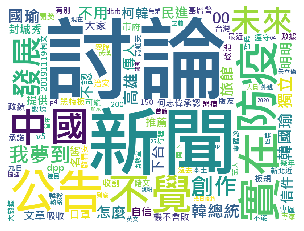

In [18]:
# -*- coding: utf-8 -*-  
import os

from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#https://hampao.wordpress.com/2016/04/08/building-a-wordcloud-using-a-td-idf-vectorizer-on-twitter-data/
freqs = [(word, x.getcol(idx).sum()) for word, idx in tfidf.vocabulary_.items()]

# Chinese fonts must be set
font = r"C:\Windows\Fonts\msjhbd.ttc"
w = WordCloud(font_path=font,width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

plt.imshow(w)
plt.axis("off")
plt.show()

w.to_file("WordCloud.png")